<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/petrol_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go

## Ceny paliw w Indiach

W tym zeszycie będziemy omawiać zestawienie zbiorów danych dostępnych na platformie kaggle.

Dane zostały udostępnione na podstawie licencji CC0 na [tej stronie kaggle](https://www.kaggle.com/syedjaferk/petrol-price-data-by-district).

Zapoznajmy się z materiałem dostępnym w notebooku i na podstawie instrukcji przygotujmy dane, które będą potrzebne podczas zajęć.

**Uwaga.** Wracając do dokumentu, pamiętaj o ponownym wywołaniu komórek z kodem.

### Zawartość zbioru danych

W tym przypadku importujemy informacje dotyczące:

*   **city** - miasta, dla którego odnotowano wskazaną cenę,
*   **date** - daty, kiedy odnotowano daną cenę,
*   **rate** - ceny paliwa,
*   **district** - dysktryktu Indii, w którym znajduje się miasto.



Potrzebne nam dane zostały udostępnione wraz z dokumentem - poniższy kod importuje plik.

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
petrol_prices = pd.read_csv('/content/drive/My Drive/Vis/Petrol Prices/petrol_prices.csv')
petrol_prices

,city,date,rate,district
0,Chittoor,2016-07-01,70.75,Andhra Pradesh
1,Chittoor,2016-07-15,68.43,Andhra Pradesh
2,Chittoor,2016-08-01,67.06,Andhra Pradesh
3,Chittoor,2016-08-15,66.08,Andhra Pradesh
4,Chittoor,2016-09-01,69.56,Andhra Pradesh
...,...,...,...,...
21679,Kadapa,2021-02-25,96.12,Andhra Pradesh
21680,Kadapa,2021-02-26,96.12,Andhra Pradesh
21681,Kadapa,2021-02-27,96.36,Andhra Pradesh
21682,Kadapa,2021-02-28,96.36,Andhra Pradesh


## Przygotowanie zeszytu

Na początku chcemy upewnić się, że dane zostały poprawnie rozpoznane i dokonać potrzebnych konwersji.

Na podstawie podglądu danych powyżej spodziewamy się, że pierwsza kolumna zawiera informacje tekstowe, podobnie jest w przypadku kolumny ostatniej. Kolumna **date** zakładamy, że powinna zawierać wyłącznie daty, zaś **rate** wartości numeryczne.

Sprawdźmy, co w rzeczywistości znajduje się w zestawie.

### Sprawdzenie typów danych

Poniżej potrzebujemt wykonać dołączone instrukcje, aby otrzymać ramki danych wykorzystywane na zajęciach.

Najpierw sprawdźmy, jak zostały rozpoznane dane podczas importu.

In [8]:
petrol_prices.dtypes

city         object
date         object
rate        float64
district     object
dtype: object

Podobnie jak w przypadku pozostałych zbiorów, określmy, czy w danych znajdują się rekordy, dla których brakuje informacji w którejkolwiek z kolumn.

In [9]:
"complete records: " + str(len(petrol_prices.dropna(how="any"))) + "; total records: " + str(len(petrol_prices))

'complete records: 21684; total records: 21684'

### Konwersja daty

W przypadku kolumny **date** potrzebujemy dokonać konwersji danych tak, by zostały one rozpoznane jako poprawne daty.

In [10]:
petrol_prices["date"] = pd.to_datetime(petrol_prices["date"])

Określmy jeszcze, czy każda z dat występuje w zbiorze tę samą liczbę razy - jeśli nie, spodziewamy się, że w przypadku pewnych miast nie będziemy posiadali informacji dla pełnego okresu.

In [11]:
petrol_prices["date"].value_counts()

date
2019-08-27    25
2016-11-06    25
2016-11-16    25
2017-10-04    25
2020-02-27    24
              ..
2019-08-12     1
2019-07-12     1
2019-07-11     1
2019-03-29     1
2019-12-28     1
Name: count, Length: 1073, dtype: int64

### Identyfikacja nazw miast w zbiorze

W następnej kolejności przyjrzyjmy się zawartości kolumny **city**.

In [12]:
petrol_prices["city"].value_counts()

city
Chandigarh         1044
Hyderabad          1036
Silvassa            964
Daman               964
Itanagar            920
Port Blair          916
Vizag               880
Guntur              880
Golaghat            880
Ambikapur           880
Araria              880
Vizianagaram        876
Kakinada            876
Barpeta             876
Srikakulam          876
Anantapur           876
Kadapa              876
Machilipatnam       876
Kurnool             876
Nellore             876
Ongole              876
Dibrugarh           876
Eluru               876
Chittoor            872
Connaught Place      56
Name: count, dtype: int64

Zauważmy, że w zbiorze znajdują się grupy miast, dla których posiadamy podobne liczby obserwacji. Możemy spodziewać się, że ciekawe wnioski możemy otrzymać, zestawiając ze sobą obserwacje dla:
*   Chandigarh i Hyderabad,
*   Silvassa i Daman,
*   Itanagar i Port Blair,
*   Vizag, Guntur, Araria, Golaghat i Ambikapur,
*   Grupy miast, dla których posiadamy 876 obserwacji,

o ile mówimy w tych przypadkach o zbliżonych okresach.


### Identyfikacja nazw dystryktów w zbiorze

Kolejną kolumną, której przyjrzymy się bliżej jest **district**.

In [13]:
petrol_prices["district"].value_counts()

district
Andhra Pradesh                 12428
Assam                           2632
Chandigarh                      1044
Dadra and Nagar Haveli           964
Daman and Diu                    964
Arunachal Pradesh                920
Andaman and Nicobar Islands      916
Chhattisgarh                     880
Bihar                            880
Delhi                             56
Name: count, dtype: int64

W tym przypadku zmienimy typ danych na kategoryczny.

In [14]:
petrol_prices["district"] = petrol_prices["district"].astype("category")

### Statystyki cen

Na koniec przyjrzyjmy się statystykom obserwowanych cen.

In [15]:
petrol_prices.describe()

,date,rate
count,21684,21684.000000
mean,2019-07-19 17:19:25.467625984,77.714397
min,2011-11-16 00:00:00,48.600000
25%,2018-09-17 00:00:00,73.650000
50%,2019-11-05 00:00:00,77.150000
75%,2020-07-19 00:00:00,83.620000
max,2021-03-01 00:00:00,97.850000
std,NaN,7.312926


## Zadania

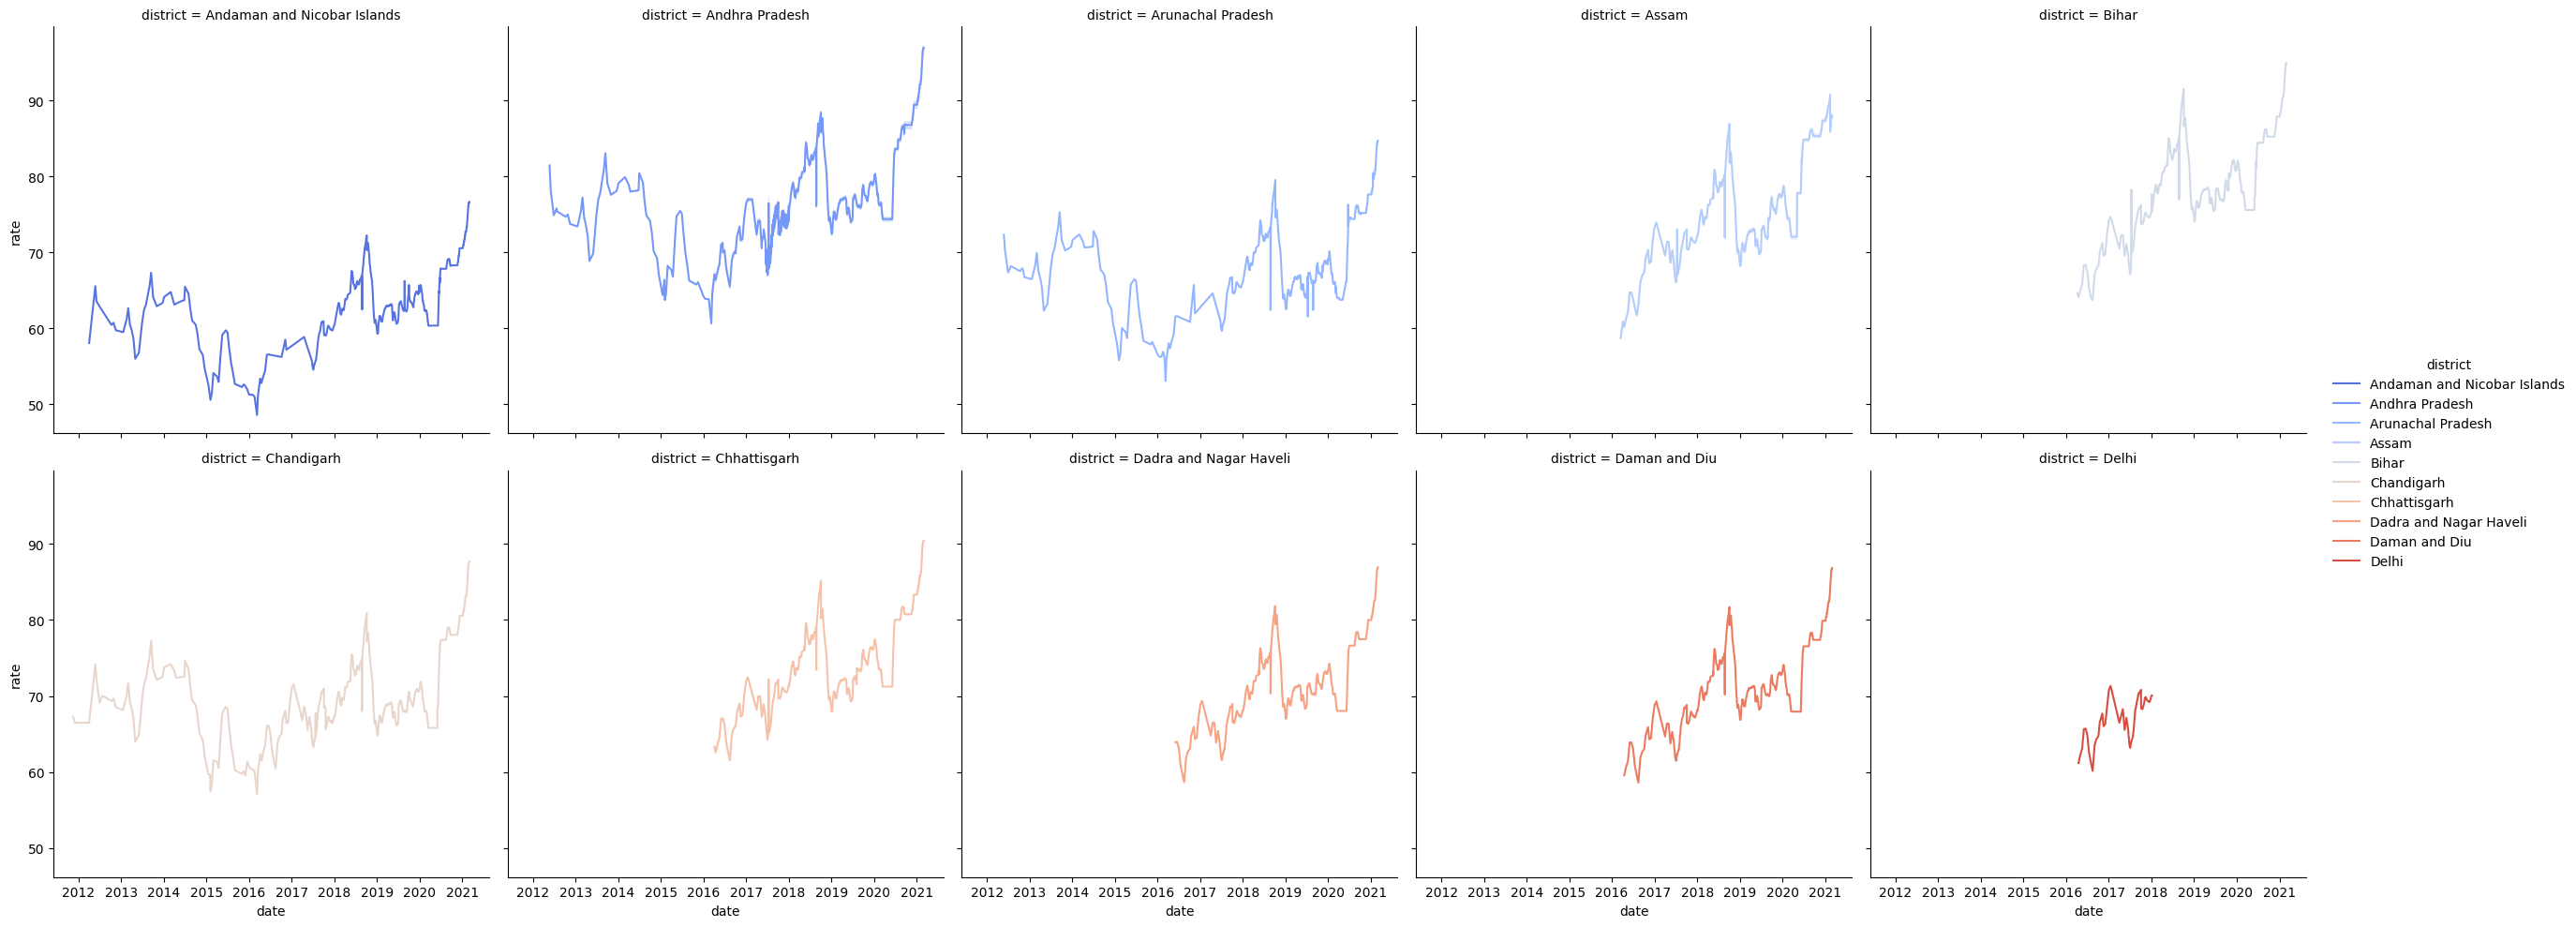

In [16]:
#Stwórz wykres liniowy, który zobrazuje jak kształtowały się ceny paliw w analizowanym okresie. w kolejnych kolumnach niech będą
#tworzone wykresy dla różnych dystryktów, przy czym maksymalną liczbę kolumn w rzędzie ustaw na 5. Dodatkowo wyróżnij kolorem linie dla różnych dystryktów.

sns.relplot(data=petrol_prices,
  x=petrol_prices["date"],
  y=petrol_prices["rate"],
  kind = "line",
  sizes=(10,500),
  hue=petrol_prices["district"],
  palette="coolwarm",
  col=petrol_prices["district"],
  col_wrap=5
  );

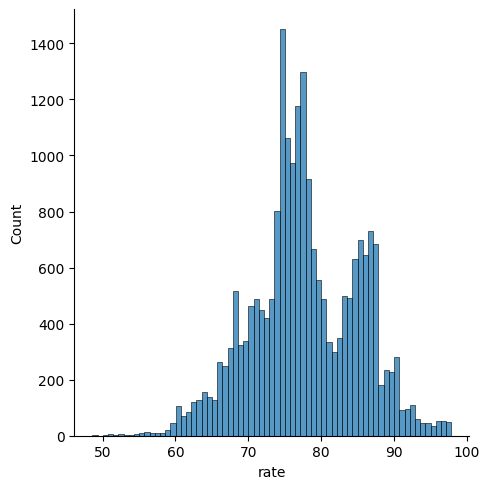

In [17]:
#Stwórz histogram, który zobrazuje jak kształtowały się ceny paliw w analizowanym okresie.

sns.displot(data=petrol_prices,
  x=petrol_prices["rate"],
  );





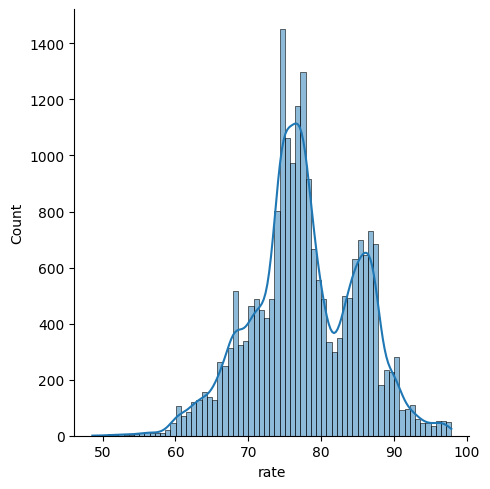

In [18]:

sns.displot(data=petrol_prices,
  x=petrol_prices["rate"],
  kde=True
  );


Przejdź do sekcji Zadania i wywołaj metodę px.colors.qualitative.swatches(). Znajdź interesującą Cię paletę barw i wykorzystaj do stworzenia wykresu liniowego, na którym znajdzie się informacja o cenach paliw w Ararii i Golaghat, przy czym nazwa miasta posłuży do rozróżnienia koloru linii.

In [19]:
px.colors.qualitative.swatches()

In [20]:
fig = px.line(
  data_frame=petrol_prices,
  x="date",
  y="rate",
  color="city",
  line_dash="city",
  facet_col="district",
  facet_col_wrap=5
)
fig.show()

In [21]:
filtered_data = petrol_prices[petrol_prices['city'].isin(['Araria', 'Golaghat'])]

In [28]:
fig = px.line(
  data_frame=filtered_data,
  x="date",
  y="rate",
  color="city",
  line_dash="city",
  color_discrete_sequence = [px.colors.qualitative.Prism[1], px.colors.qualitative.Prism[3]]

)
fig.update_layout(plot_bgcolor='#E2D7D4')

fig.show()

In [24]:
filtered_datas = petrol_prices[petrol_prices['city'].isin(['Chandigarh', 'Hyderabad'])]
fig = px.line(
  data_frame=filtered_datas,
  x="date",
  y="rate",
  color="city",
  line_dash="city"
)
fig.show()